# SMS Spam Collection Dataset

### Imports

In [1]:
import csv
import pandas as pd
import numpy as np
import pylab as pl
import json
import string
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn import svm
from sklearn import model_selection
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, GradientBoostingClassifier
import itertools
from sklearn.linear_model import LogisticRegression
from __future__ import print_function
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from nltk.stem import SnowballStemmer
from nltk.corpus import stopwords
import nltk
from prettytable import PrettyTable
# from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, make_scorer, precision_score, recall_score, f1_score
# from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score

figsize = (24,6)
fontsize = 22

/home/nihira/anaconda2/envs/py36/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:

df = pd.read_json('yelp_academic_dataset_business.json', orient='columns', lines='true')


In [3]:
subset = df[df['categories'].str.contains("Home Services")==True]

In [4]:
subset.shape

(18634, 15)

Text(0,0.5,'No of Home Services')

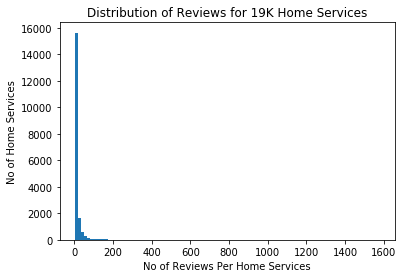

In [5]:
# subset.hist(column='review_count', bins=100)
axes = subset.hist(sharey=True, sharex=True, column='review_count', bins=100)
pl.grid(False)
pl.title("Distribution of Reviews for 19K Home Services")
pl.xlabel("No of Reviews Per Home Services")
pl.ylabel("No of Home Services")


### Reading the created csv file

In [6]:
subset.shape

(18634, 15)

In [7]:
subset.categories

20        Home Services, Masonry/Concrete, Professional ...
26         Home Services, Home Automation, Security Systems
31        Shopping, Gardeners, Home Services, Nurseries ...
42        Home Services, Shopping, Home & Garden, Kitche...
45        Flooring, Cabinetry, Refinishing Services, Hom...
54                                    Movers, Home Services
55                                  Plumbing, Home Services
58                               Home Services, Contractors
70        Landscaping, Home Services, Home & Garden, Sno...
118       Door Sales/Installation, Home Services, Contra...
121                        Keys & Locksmiths, Home Services
122                  Apartments, Home Services, Real Estate
124                  Apartments, Real Estate, Home Services
133                 Landscaping, Home Services, Contractors
195       Real Estate, Home Staging, Interior Design, Es...
200       Carpet Cleaning, Home Services, Local Services...
208       Gardeners, Home Services, Land

In [5]:
df2 = subset.sort_values(by=['review_count'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f116cca2fd0>]],
      dtype=object)

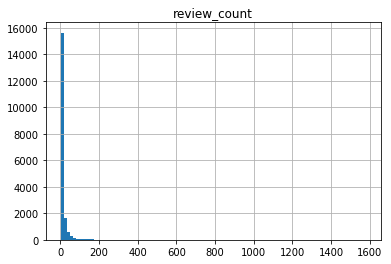

In [9]:
df2.hist(column='review_count', bins=100)

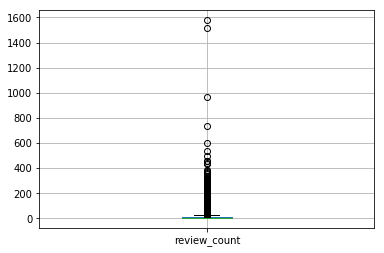

In [10]:
df2.boxplot(column='review_count')

In [6]:
df3 = df2[df2['review_count']>100]

In [7]:
df3.shape

(248, 15)

In [8]:
sampleBusiness = df3

In [9]:
sum(sampleBusiness['review_count'])

47915

In [10]:
businessIds = sampleBusiness['business_id'].tolist()

In [11]:
import json
sampleReview = pd.DataFrame(columns=['review_id', 'user_id', 'business_id', 'stars', 'date', 'text', 'useful', 'funny', 'cool'])
count = 0
with open('yelp_academic_dataset_review.json', 'r') as f:
    for i, line in enumerate(f, start=1):
        if not (i % 10000):
            print(f'Parsed {i} lines')
        line_data = json.loads(line)
        if(line_data['business_id'] in businessIds):
            sampleReview.loc[count] = line_data
            count = count + 1
        

Parsed 10000 lines
Parsed 20000 lines
Parsed 30000 lines
Parsed 40000 lines
Parsed 50000 lines
Parsed 60000 lines
Parsed 70000 lines
Parsed 80000 lines
Parsed 90000 lines
Parsed 100000 lines
Parsed 110000 lines
Parsed 120000 lines
Parsed 130000 lines
Parsed 140000 lines
Parsed 150000 lines
Parsed 160000 lines
Parsed 170000 lines
Parsed 180000 lines
Parsed 190000 lines
Parsed 200000 lines
Parsed 210000 lines
Parsed 220000 lines
Parsed 230000 lines
Parsed 240000 lines
Parsed 250000 lines
Parsed 260000 lines
Parsed 270000 lines
Parsed 280000 lines
Parsed 290000 lines
Parsed 300000 lines
Parsed 310000 lines
Parsed 320000 lines
Parsed 330000 lines
Parsed 340000 lines
Parsed 350000 lines
Parsed 360000 lines
Parsed 370000 lines
Parsed 380000 lines
Parsed 390000 lines
Parsed 400000 lines
Parsed 410000 lines
Parsed 420000 lines
Parsed 430000 lines
Parsed 440000 lines
Parsed 450000 lines
Parsed 460000 lines
Parsed 470000 lines
Parsed 480000 lines
Parsed 490000 lines
Parsed 500000 lines
Parsed 51

Parsed 3970000 lines
Parsed 3980000 lines
Parsed 3990000 lines
Parsed 4000000 lines
Parsed 4010000 lines
Parsed 4020000 lines
Parsed 4030000 lines
Parsed 4040000 lines
Parsed 4050000 lines
Parsed 4060000 lines
Parsed 4070000 lines
Parsed 4080000 lines
Parsed 4090000 lines
Parsed 4100000 lines
Parsed 4110000 lines
Parsed 4120000 lines
Parsed 4130000 lines
Parsed 4140000 lines
Parsed 4150000 lines
Parsed 4160000 lines
Parsed 4170000 lines
Parsed 4180000 lines
Parsed 4190000 lines
Parsed 4200000 lines
Parsed 4210000 lines
Parsed 4220000 lines
Parsed 4230000 lines
Parsed 4240000 lines
Parsed 4250000 lines
Parsed 4260000 lines
Parsed 4270000 lines
Parsed 4280000 lines
Parsed 4290000 lines
Parsed 4300000 lines
Parsed 4310000 lines
Parsed 4320000 lines
Parsed 4330000 lines
Parsed 4340000 lines
Parsed 4350000 lines
Parsed 4360000 lines
Parsed 4370000 lines
Parsed 4380000 lines
Parsed 4390000 lines
Parsed 4400000 lines
Parsed 4410000 lines
Parsed 4420000 lines
Parsed 4430000 lines
Parsed 444000

In [12]:
sampleReviews = sampleReview

In [13]:
sampleReviews.shape

(47941, 9)

In [115]:
sampleReviews.head()

,review_id,user_id,business_id,stars,date,text,useful,funny,cool
0,jsDu6QEJHbwP2Blom1PLCA,msQe1u7Z_XuqjGoqhB0J5g,Ums3gaP2qM3W1XcA5r6SsQ,5,2014-09-05,Delicious healthy food. The steak is amazing. ...,0,0,0
1,5k9F53Lanw09xR3nwCdRYg,Yy_iGXxLpL6tYDQoE-6XVg,7wHLFohwCw8l6WS-feLjeg,5,2017-04-05,I had an amazing time here. They were very bus...,1,0,1
2,4KbJXuf8H2pGQnUatmc1LQ,OQT9DjfBrzrwOEdVJjuYIA,--cZ6Hhc9F7VkKXxHMVZSQ,5,2012-12-19,Our family of five got the Latin Combo-- full ...,1,0,0
3,Cn6gKCsMCjapKE0AaPAWBA,AuIK5tF2GjO7SftHawTLKw,Gaq3S9lmjXVcuDCZ8ulppw,5,2009-08-06,I just love sushi so I'm biased when it comes ...,0,0,0
4,fKPRKvImyawPSPw_5ie12A,UGW-9bbBEB3eP1o6mWD_WA,TgcjQfl1E9DE-SjDVOUDJQ,3,2013-07-23,The space is very small but it's nice for grou...,2,0,1


In [14]:
userIds = sampleReviews['user_id'].tolist()

In [15]:
sampleUsers = pd.DataFrame(columns=['user_id', 'name', 'review_count', 'yelping_since', 'friends', 'useful', 'funny', 'cool', 'fans', 'elite', 'average_stars', 'compliment_hot', 'compliment_more', 'compliment_profile', 'compliment_cute', 'compliment_list', 'compliment_note', 'compliment_plain', 'compliment_cool', 'compliment_funny', 'compliment_writer', 'compliment_photos'])
count = 0
with open('yelp_academic_dataset_user.json', 'r') as f:
    for i, line in enumerate(f, start=1):
        if not (i % 10000):
            print(f'Parsed {i} lines')
        line_data = json.loads(line)
        if(line_data['user_id'] in userIds):
            sampleUsers.loc[count] = line_data
            count = count + 1
        

Parsed 10000 lines
Parsed 20000 lines
Parsed 30000 lines
Parsed 40000 lines
Parsed 50000 lines
Parsed 60000 lines
Parsed 70000 lines
Parsed 80000 lines
Parsed 90000 lines
Parsed 100000 lines
Parsed 110000 lines
Parsed 120000 lines
Parsed 130000 lines
Parsed 140000 lines
Parsed 150000 lines
Parsed 160000 lines
Parsed 170000 lines
Parsed 180000 lines
Parsed 190000 lines
Parsed 200000 lines
Parsed 210000 lines
Parsed 220000 lines
Parsed 230000 lines
Parsed 240000 lines
Parsed 250000 lines
Parsed 260000 lines
Parsed 270000 lines
Parsed 280000 lines
Parsed 290000 lines
Parsed 300000 lines
Parsed 310000 lines
Parsed 320000 lines
Parsed 330000 lines
Parsed 340000 lines
Parsed 350000 lines
Parsed 360000 lines
Parsed 370000 lines
Parsed 380000 lines
Parsed 390000 lines
Parsed 400000 lines
Parsed 410000 lines
Parsed 420000 lines
Parsed 430000 lines
Parsed 440000 lines
Parsed 450000 lines
Parsed 460000 lines
Parsed 470000 lines
Parsed 480000 lines
Parsed 490000 lines
Parsed 500000 lines
Parsed 51

In [118]:
sampleUsers.shape

(43332, 22)

In [119]:
sampleUsers.head()

,user_id,name,review_count,yelping_since,friends,useful,funny,cool,fans,elite,...,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
0,DMJfDuXSswX9Gyt1UcmJpw,Leo,2,2015-08-21,None,0,0,0,0,None,...,0,0,0,0,0,0,0,0,0,0
1,N8rnN-vBSKICcTMlhLgNOw,Bingo,18,2014-01-27,None,7,2,2,0,None,...,0,0,0,0,0,0,0,0,0,0
2,3iNM5vT33PhjmXC7jglusw,Brian,6,2013-05-31,None,0,1,0,0,None,...,0,0,0,0,0,0,0,0,0,0
3,SS5qLDpUkrHmvvlMTo0KCw,Rick,4,2015-05-25,None,0,0,0,0,None,...,0,0,0,0,0,0,0,0,0,0
4,e_S4E7aa7k47YrDsui_XGA,Susan,14,2013-09-10,None,2,0,0,0,None,...,0,0,0,0,0,0,0,0,0,0


In [16]:
sampleUsers.to_csv("sample_users_HS.csv")

In [17]:
sampleReviews.to_csv("sample_reviews_HS.csv")

In [18]:
sampleBusiness.to_csv("sample_business_HS.csv")

In [19]:

samB = pd.read_csv('sample_business_HS.csv')


In [20]:
samB.shape

(248, 16)

In [21]:
samB.head()

,Unnamed: 0,address,attributes,business_id,categories,city,hours,is_open,latitude,longitude,name,neighborhood,postal_code,review_count,stars,state
0,29291,NaN,"{'BusinessAcceptsCreditCards': 'True', 'ByAppo...",52C6L3kbcvMO7apMEG0l2g,"Contractors, Home Services, Garage Door Services",Gilbert,"{'Monday': '0:0-0:0', 'Tuesday': '0:0-0:0', 'W...",1,33.351930,-111.821087,MasterCraft Garage Door Service,NaN,85233,101,5.0,AZ
1,173042,740 N Madrid Ln,"{'BusinessAcceptsBitcoin': 'True', 'BusinessAc...",QcnWLxl2VPJRNpaMXovKAQ,"Towing, Automotive, Security Systems, Local Se...",Chandler,"{'Monday': '6:0-23:0', 'Tuesday': '6:0-23:0', ...",1,33.315804,-111.902365,Locksmith Services For All,NaN,85226,101,5.0,AZ
2,70244,"3981 E Sunset Rd, Ste E","{'BusinessAcceptsBitcoin': 'False', 'BusinessA...",gGdcKpfiQDl3vlByqJxlPA,"Home Services, Keys & Locksmiths",Las Vegas,"{'Monday': '0:0-0:0', 'Tuesday': '0:0-0:0', 'W...",1,36.070688,-115.088296,ABC Locksmiths,NaN,89120,101,4.0,NV
3,181765,"3540 W Sahara Ave, Ste 226","{'BusinessAcceptsBitcoin': 'False', 'BusinessA...",DThDGm3W_9MaEccHfRZk2g,"Landscaping, Gardeners, Tree Services, Home Se...",Las Vegas,"{'Monday': '0:0-0:0', 'Tuesday': '0:0-0:0', 'W...",1,36.145785,-115.188565,Treepro,Westside,89102,101,4.5,NV
4,31674,"3111 S Valley View Blvd, Ste Z106","{'BusinessAcceptsBitcoin': 'False', 'BusinessA...",bK2VddQaYGUxr3FeVAzSIA,"Home Services, Painters",Las Vegas,"{'Monday': '9:0-17:0', 'Tuesday': '9:0-17:0', ...",1,36.131865,-115.192432,Paint Masters,Westside,89102,101,5.0,NV


In [22]:
samU = pd.read_csv('sample_users_HS.csv')

In [23]:
samU.shape

(42496, 23)

In [24]:
samU.head()

,Unnamed: 0,user_id,name,review_count,yelping_since,friends,useful,funny,cool,fans,...,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
0,0,BebqF5U9FdVShxZWPE-H-g,kerry,1,2011-04-29,None,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,xsEG4i1QCjuZS9urGNLNNw,Barry,3,2013-10-05,None,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,iQIne4dTLiUMcdGP_DpzVQ,Mack,1,2017-09-09,None,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,e9o7CivEHWnt-Wr_wGetnw,Paul,4,2011-09-04,None,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,PAvUfCRzSSl97v5M3ddUfw,Luke,13,2013-05-23,None,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
samR = pd.read_csv('sample_reviews_HS.csv')

In [26]:
samR.shape

(47941, 10)

In [27]:
samR.head()

,Unnamed: 0,review_id,user_id,business_id,stars,date,text,useful,funny,cool
0,0,VGU_oergctnFczEXDPHYQA,nqzeKqdWBruvdgMd6aBHrg,d4z4gjdhQYs-WOVClISf_A,5,2017-06-14,Removed several pine trees from our house in H...,0,0,0
1,1,JL6B_spdwG_gLMEdh4Z-Mg,dQzQ4bN0Rnb8M-0LqTl3-g,h1Jq1YlqPyD1mGSW0sjRaQ,1,2016-03-07,I call them to switch to their service for bot...,0,0,0
2,2,8vz39lAw8sAee3WqWFlVIQ,vc-VfW7-Q7JmHzA6bTLHyA,lH0Ph4DiYSqj9UJBXAq8hQ,5,2013-03-20,I called Just-In Time on Monday to see if they...,0,1,0
3,3,Wf1KudZRaSi0wWmn2H6PGg,IqZ4tKOTEwvE8RBXKpyn6w,WEtbc5oewinsWdhrXDcojQ,5,2016-12-14,First Choice provided Jesus and Gustavo. They ...,0,0,0
4,4,wCfuggZpKO01-Ke7ulld4Q,qr9hmaIxq1z9ycgT28PpRw,NKg7XSXPlU8NGakmCeXGgw,5,2017-06-05,Sunday early morning at 130am my AC in my hous...,0,0,0
